In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [3]:
! pip install kaggle

In [0]:
from google.colab import files

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"withankit","key":"a4d09ede70c3a8ce5c7ddccad8f09a38"}'}

In [0]:
!mkdir -p ~/.kaggle


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [10]:
! ls

kaggle.json  sample_data


In [11]:
! pwd

/content


In [12]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 72.5MB/s]
 99% 268M/271M [00:06<00:00, 47.8MB/s]
100% 271M/271M [00:06<00:00, 45.6MB/s]
 99% 537M/543M [00:20<00:00, 20.4MB/s]
100% 543M/543M [00:20<00:00, 28.0MB/s]


In [13]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [43]:
!unzip test1.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

In [14]:
os.listdir('/content')

['.config',
 'train.zip',
 'train',
 'sampleSubmission.csv',
 'test1.zip',
 'kaggle.json',
 'sample_data']

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [0]:
filenames=os.listdir("/content/train")

In [0]:
categories=[]

In [0]:
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [19]:
df.head()

,filename,category
0,dog.1631.jpg,1
1,cat.2603.jpg,0
2,cat.1518.jpg,0
3,cat.7108.jpg,0
4,dog.10217.jpg,1


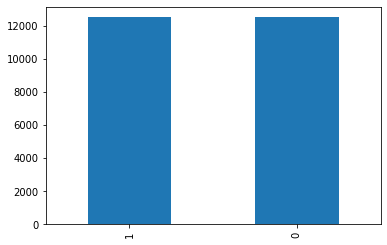

In [20]:
df['category'].value_counts().plot.bar()

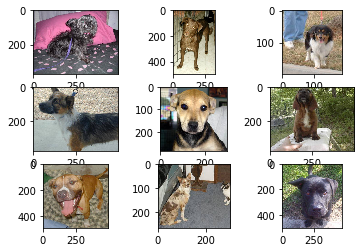

In [21]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [22]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '/content/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(25000, 200, 200, 3) (25000,)


In [23]:
!pwd

/content


In [0]:
!mkdir -p /content/train/cats

In [0]:
!mkdir -p /content/train/dogs

In [0]:
from random import random

In [31]:
import shutil
# define ratio of pictures to use for validation
val_ratio = 0.25

# copy training dataset images into subdirectories
src_directory = '/content/train/'
for file in listdir(src_directory):
	src = src_directory + file
	dst_dir = '/content/train/cats'
	if random() < val_ratio:
		dst_dir = '/content/train/'
	if file.startswith('cat'):
		dst = dst_dir + file
		shutil.copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dst_dir + 'dogs/'  + file
		shutil.copyfile(src, dst)

SameFileError: ignored

In [45]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Dense(2, activation='binary')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)       

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
callbacks = [earlystop, learning_rate_reduction]


In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.15, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

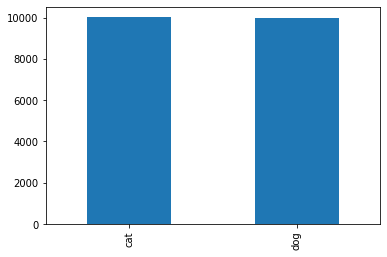

In [36]:
train_df['category'].value_counts().plot.bar()

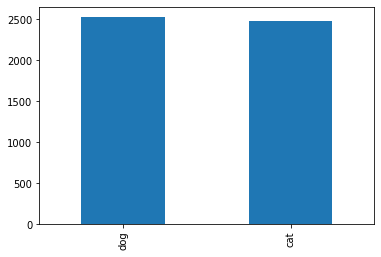

In [44]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=40

In [38]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [39]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [40]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


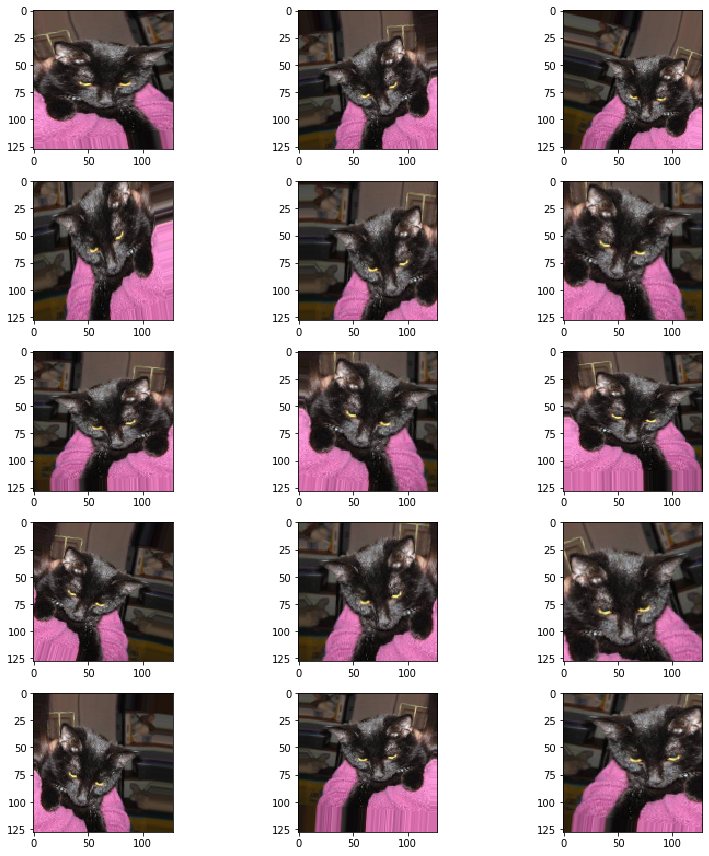

In [41]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [53]:
epochs=3 if FAST_RUN else 40
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/40
531/531 [==============================] - 86s 162ms/step - loss: 0.5104 - acc: 0.7440 - val_loss: 0.9383 - val_acc: 0.6459
Epoch 2/40
531/531 [==============================] - 84s 158ms/step - loss: 0.5136 - acc: 0.7409 - val_loss: 0.9459 - val_acc: 0.6504
Epoch 3/40
531/531 [==============================] - 84s 159ms/step - loss: 0.5076 - acc: 0.7475 - val_loss: 0.8858 - val_acc: 0.6570
Epoch 4/40
531/531 [==============================] - 84s 158ms/step - loss: 0.5123 - acc: 0.7451 - val_loss: 0.9700 - val_acc: 0.6399
Epoch 5/40
531/531 [==============================] - 84s 158ms/step - loss: 0.5060 - acc: 0.7441 - val_loss: 0.9427 - val_acc: 0.6505
Epoch 6/40
531/531 [==============================] - 84s 159ms/step - loss: 0.5064 - acc: 0.7439 - val_loss: 0.9386 - val_acc: 0.6424
Epoch 7/40
531/531 [==============================] - 84s 159ms/step - loss: 0.5013 - acc: 0.7505 - val_loss: 0.8825 - val_acc: 0.6652
Epoch 8/40
531/531 [==============================] - 8

In [0]:
model.save_weights("model.h5")

In [63]:
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator=test_datagen.flow_from_directory('/content/test1/',target_size=(224,224),batch_size=50,class_mode='binary')

Found 0 images belonging to 0 classes.


In [0]:
test_file=os.listdir(r'/content/test1')
test_df=pd.DataFrame({'filename':test_file})
t_test=test_df.shape[0]

test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(test_df,"/content/test1/", x_col='filename', y_col=None, class_model=None, target_size=(224,224), shuffle=False)
predict=model.predict_generator(test_generator,steps=np.ceil(t_test/32,verbose=1))


test_df['label']=predict
test_df['id']=test_df['filename'].str.replace('.jpg','')
test_df['id']=test_df['id'].astype(int)
test_df.sort_values(by='id')

test_df.head()

test_df[['id','label']].to_csv('final.csv',index=False)

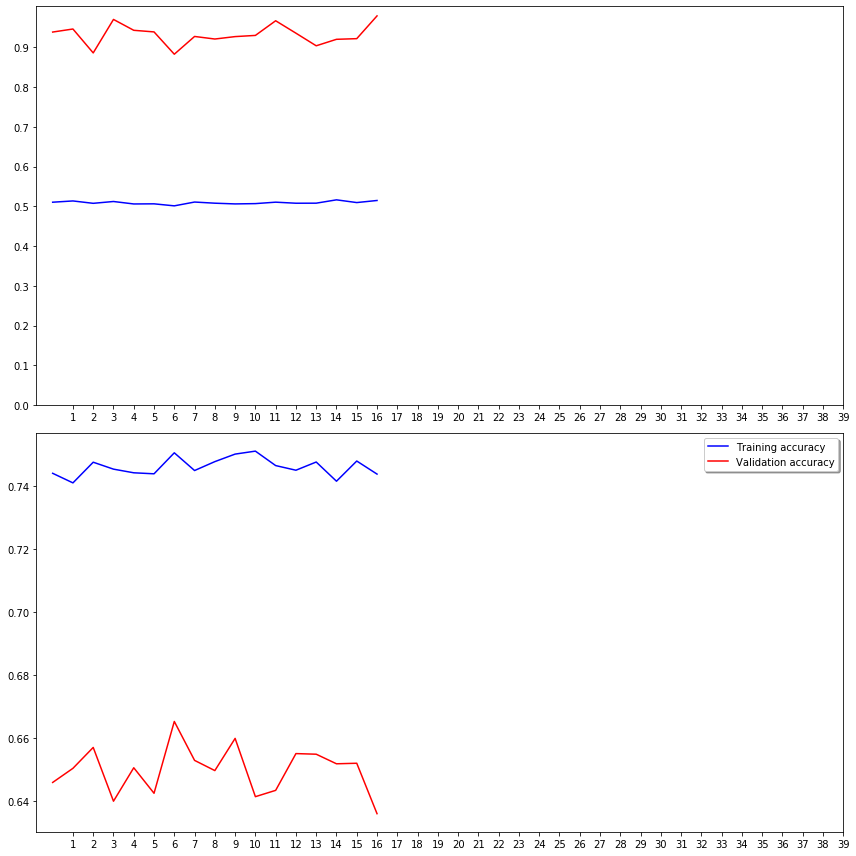

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()